In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from time import perf_counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, make_scorer, recall_score, classification_report

In [2]:
with open('TrainData/train.pkl', 'rb') as f:
    train = pickle.load(f)

train.head()

,CustomerID,ReportedFraud,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit,TimeDelta
0,20065,0,0,1,2,3,6,3,360,19,...,577,1,3,11,18,-0.834616,-0.636247,-0.151765,-0.290132,0.469348
1,37589,0,2,2,1,0,1,2,604,14,...,29,0,2,13,14,1.021569,0.893521,-1.081375,-0.983964,0.218107
2,24312,0,0,2,0,0,2,1,490,21,...,692,0,6,6,8,-0.834616,0.893521,1.397586,1.444450,0.226454
3,5493,1,0,2,0,0,4,3,369,12,...,809,0,1,3,8,0.880455,-1.116315,-1.081375,-0.983964,1.509788
4,7704,1,0,2,0,3,1,5,325,3,...,160,1,5,11,5,-0.834616,0.893521,-0.151765,-0.290132,0.053673


In [3]:
train = train.drop(['CustomerID', 'InsuredZipCode'], axis=1)
train.head()

,ReportedFraud,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit,TimeDelta
0,0,0,1,2,3,6,3,360,19,2,...,2.399207,1,3,11,18,-0.834616,-0.636247,-0.151765,-0.290132,0.469348
1,0,2,2,1,0,1,2,604,14,0,...,-0.602204,0,2,13,14,1.021569,0.893521,-1.081375,-0.983964,0.218107
2,0,0,2,0,0,2,1,490,21,2,...,1.648854,0,6,6,8,-0.834616,0.893521,1.397586,1.444450,0.226454
3,1,0,2,0,0,4,3,369,12,2,...,-1.727734,0,1,3,8,0.880455,-1.116315,-1.081375,-0.983964,1.509788
4,1,0,2,0,3,1,5,325,3,2,...,-1.477616,1,5,11,5,-0.834616,0.893521,-0.151765,-0.290132,0.053673


In [4]:
X = train.drop(['ReportedFraud'], axis=1)
y = train['ReportedFraud']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
params = {
    'base_estimator': [None, LogisticRegression(max_iter=30000), DecisionTreeClassifier(max_depth=5), LinearSVC()],
    'n_estimators': [20, 50, 100, 250, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 2]
}

In [9]:
recall_1 = make_scorer(recall_score, pos_label=1)

In [ ]:
ada_boost = AdaBoostClassifier()

rand_search = RandomizedSearchCV(ada_boost, params, n_iter=100, cv=5, verbose=1, scoring=recall_1, n_jobs=-1)
rand_search.fit(X_train, y_train)


In [20]:
rand_search_res = pd.DataFrame(rand_search.cv_results_).dropna().sort_values(by='rank_test_score', ascending=True)[:10]
rand_search_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_base_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
78,79.510407,2.164460,0.545850,0.079686,500,0.05,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 500, 'learning_rate': 0.05, '...",0.827948,0.819063,0.805331,0.825384,0.807599,0.817065,0.009153,1
77,156.960226,1.633924,0.963291,0.085047,1000,0.1,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 1000, 'learning_rate': 0.1, '...",0.827141,0.825525,0.795638,0.816492,0.813258,0.815611,0.011282,2
98,156.375733,1.493814,0.926147,0.054261,1000,0.5,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 1000, 'learning_rate': 0.5, '...",0.827948,0.820679,0.805331,0.813258,0.810024,0.815448,0.008002,3
88,38.798198,0.253707,0.214423,0.003201,250,0.1,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 250, 'learning_rate': 0.1, 'b...",0.823910,0.816640,0.790792,0.814875,0.810833,0.811410,0.011145,4
28,159.544757,8.101197,1.097462,0.161538,1000,1,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 1000, 'learning_rate': 1, 'ba...",0.815024,0.827948,0.785137,0.805982,0.813258,0.809470,0.014078,5
87,158.170664,1.719071,0.891175,0.038751,1000,0.01,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 1000, 'learning_rate': 0.01, ...",0.823910,0.810178,0.789176,0.816492,0.803557,0.808662,0.011848,6
62,79.475082,1.169598,0.567892,0.168169,500,0.1,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 500, 'learning_rate': 0.1, 'b...",0.817447,0.815832,0.798061,0.806791,0.799515,0.807529,0.008021,7
59,80.855063,3.369828,0.522768,0.075943,500,0.01,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 500, 'learning_rate': 0.01, '...",0.820679,0.807754,0.783522,0.808407,0.799515,0.803975,0.012257,8
64,39.547549,0.143743,0.238541,0.011696,250,0.01,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 250, 'learning_rate': 0.01, '...",0.806947,0.794830,0.768174,0.800323,0.795473,0.793150,0.013220,10
43,8.835179,0.217998,0.071335,0.005640,50,0.5,DecisionTreeClassifier(max_depth=5),"{'n_estimators': 50, 'learning_rate': 0.5, 'ba...",0.797254,0.806139,0.778675,0.793048,0.789006,0.792824,0.009074,11


In [21]:
param_fast = {'base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=3)],
                'learning_rate': [0.08, 0.1, 0.12],
                'n_estimators': [200, 250, 300]}

grid_fast = GridSearchCV(ada_boost, param_fast, scoring=recall_1, cv=5, n_jobs=3, verbose=1)
grid_fast.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=3,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.08, 0.1, 0.12],
                         'n_estimators': [200, 250, 300]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=1)

In [22]:
grid_fast_res = pd.DataFrame(grid_fast.cv_results_).sort_values(by='rank_test_score', ascending=True)[:10]
grid_fast_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,46.448916,3.571903,0.235495,0.004542,DecisionTreeClassifier(max_depth=5),0.08,300,{'base_estimator': DecisionTreeClassifier(max_...,0.823910,0.813409,0.796446,0.808407,0.810833,0.810601,0.008834,1
5,43.646861,0.359441,0.235732,0.003502,DecisionTreeClassifier(max_depth=5),0.1,300,{'base_estimator': DecisionTreeClassifier(max_...,0.822294,0.823910,0.797254,0.811641,0.796281,0.810276,0.011812,2
4,36.163391,0.092343,0.197075,0.003220,DecisionTreeClassifier(max_depth=5),0.1,250,{'base_estimator': DecisionTreeClassifier(max_...,0.821486,0.816640,0.789176,0.811641,0.808407,0.809470,0.011077,3
1,46.584503,1.445731,0.207800,0.010301,DecisionTreeClassifier(max_depth=5),0.08,250,{'base_estimator': DecisionTreeClassifier(max_...,0.818255,0.811793,0.792407,0.811641,0.811641,0.809148,0.008748,4
17,27.123439,0.118956,0.216133,0.006019,DecisionTreeClassifier(max_depth=3),0.12,300,{'base_estimator': DecisionTreeClassifier(max_...,0.824717,0.816640,0.781099,0.815683,0.804365,0.808501,0.015158,5
0,57.329606,14.743292,0.292771,0.101512,DecisionTreeClassifier(max_depth=5),0.08,200,{'base_estimator': DecisionTreeClassifier(max_...,0.823102,0.816640,0.778675,0.814875,0.805174,0.807693,0.015604,6
8,44.005530,0.049345,0.243253,0.011373,DecisionTreeClassifier(max_depth=5),0.12,300,{'base_estimator': DecisionTreeClassifier(max_...,0.821486,0.817447,0.790792,0.811641,0.794665,0.807206,0.012290,7
3,28.863363,0.104529,0.159007,0.006586,DecisionTreeClassifier(max_depth=5),0.1,200,{'base_estimator': DecisionTreeClassifier(max_...,0.819871,0.819871,0.790792,0.812449,0.793048,0.807206,0.012792,8
16,22.413726,0.065780,0.180443,0.001360,DecisionTreeClassifier(max_depth=3),0.12,250,{'base_estimator': DecisionTreeClassifier(max_...,0.826333,0.809370,0.782714,0.813258,0.803557,0.807046,0.014284,9
7,36.632481,0.056685,0.198762,0.004212,DecisionTreeClassifier(max_depth=5),0.12,250,{'base_estimator': DecisionTreeClassifier(max_...,0.809370,0.819871,0.784330,0.805174,0.803557,0.804460,0.011560,10


In [12]:

params = {
    'base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=6)],
    'learning_rate': [0.06, 0.08, 0.1, 0.12],
    'n_estimators': [250, 300, 350]
}

grid = GridSearchCV(AdaBoostClassifier(), params, scoring=recall_1, cv=5, n_jobs=3, verbose=1)
start = perf_counter()
grid.fit(X_train, y_train)
end = perf_counter()
print(end - start, ' seconds')

grid_res = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)[:10]
grid_res


Fitting 5 folds for each of 36 candidates, totalling 180 fits
2813.9570234  seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,42.495440,0.120159,0.280063,0.003578,DecisionTreeClassifier(max_depth=4),0.08,350,{'base_estimator': DecisionTreeClassifier(max_...,0.816653,0.820657,0.819055,0.816653,0.819712,0.818546,0.001627,1
5,52.513740,0.096801,0.313975,0.041720,DecisionTreeClassifier(max_depth=5),0.08,350,{'base_estimator': DecisionTreeClassifier(max_...,0.819055,0.819055,0.818255,0.813451,0.820513,0.818066,0.002420,2
4,45.093519,0.180438,0.255969,0.007100,DecisionTreeClassifier(max_depth=5),0.08,300,{'base_estimator': DecisionTreeClassifier(max_...,0.824660,0.818255,0.819055,0.802242,0.824519,0.817746,0.008198,3
8,52.634672,0.199719,0.298471,0.003933,DecisionTreeClassifier(max_depth=5),0.1,350,{'base_estimator': DecisionTreeClassifier(max_...,0.816653,0.815853,0.822258,0.813451,0.818910,0.817425,0.002981,4
29,62.498283,0.386580,0.309373,0.006310,DecisionTreeClassifier(max_depth=6),0.08,350,{'base_estimator': DecisionTreeClassifier(max_...,0.827062,0.811849,0.819856,0.818255,0.810096,0.817424,0.006071,5
0,38.208466,0.212714,0.265982,0.016165,DecisionTreeClassifier(max_depth=5),0.06,250,{'base_estimator': DecisionTreeClassifier(max_...,0.817454,0.818255,0.822258,0.806245,0.818109,0.816464,0.005383,6
1,46.052523,0.654448,0.287068,0.058346,DecisionTreeClassifier(max_depth=5),0.06,300,{'base_estimator': DecisionTreeClassifier(max_...,0.815052,0.815853,0.823058,0.809448,0.818109,0.816304,0.004420,7
7,44.919496,0.101414,0.252655,0.003267,DecisionTreeClassifier(max_depth=5),0.1,300,{'base_estimator': DecisionTreeClassifier(max_...,0.818255,0.819856,0.813451,0.810248,0.818109,0.815984,0.003577,8
31,53.136478,0.130260,0.266892,0.003941,DecisionTreeClassifier(max_depth=6),0.1,300,{'base_estimator': DecisionTreeClassifier(max_...,0.815052,0.821457,0.814251,0.815853,0.813301,0.815983,0.002865,9
2,52.457796,0.135224,0.290466,0.005784,DecisionTreeClassifier(max_depth=5),0.06,350,{'base_estimator': DecisionTreeClassifier(max_...,0.821457,0.811849,0.817454,0.812650,0.815705,0.815823,0.003472,10


In [13]:
params = {
    'base_estimator': [DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=5)],
    'learning_rate': [0.06, 0.08, 0.1],
    'n_estimators': [320, 350, 400] 
}

grid = GridSearchCV(AdaBoostClassifier(), params, scoring=recall_1, cv=5, n_jobs=3, verbose=1)
start = perf_counter()
grid.fit(X_train, y_train)
end = perf_counter()
print(end - start, ' seconds')

grid_res = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)[:10]
grid_res

Fitting 5 folds for each of 18 candidates, totalling 90 fits
1645.6812112999996  seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,45.396409,1.120461,0.317879,0.058019,DecisionTreeClassifier(max_depth=4),0.08,350,{'base_estimator': DecisionTreeClassifier(max_...,0.815853,0.820657,0.819055,0.816653,0.819712,0.818386,0.001832,1
3,43.878429,0.699734,0.268166,0.016058,DecisionTreeClassifier(max_depth=4),0.08,320,{'base_estimator': DecisionTreeClassifier(max_...,0.811049,0.817454,0.821457,0.817454,0.819712,0.817425,0.003525,2
10,56.015656,0.363569,0.299182,0.015453,DecisionTreeClassifier(max_depth=5),0.06,350,{'base_estimator': DecisionTreeClassifier(max_...,0.821457,0.818255,0.821457,0.814251,0.809295,0.816943,0.004652,3
13,53.651963,0.720765,0.288110,0.023998,DecisionTreeClassifier(max_depth=5),0.08,350,{'base_estimator': DecisionTreeClassifier(max_...,0.819055,0.812650,0.818255,0.811049,0.822917,0.816785,0.004357,4
9,49.365751,0.353007,0.290571,0.021299,DecisionTreeClassifier(max_depth=5),0.06,320,{'base_estimator': DecisionTreeClassifier(max_...,0.816653,0.817454,0.817454,0.811049,0.820513,0.816625,0.003085,5
11,63.262041,0.639239,0.353585,0.034434,DecisionTreeClassifier(max_depth=5),0.06,400,{'base_estimator': DecisionTreeClassifier(max_...,0.823058,0.813451,0.823058,0.812650,0.810096,0.816463,0.005498,6
5,49.281390,1.773704,0.309373,0.011883,DecisionTreeClassifier(max_depth=4),0.08,400,{'base_estimator': DecisionTreeClassifier(max_...,0.815052,0.815052,0.822258,0.811849,0.814103,0.815663,0.003499,7
14,61.144000,0.194927,0.335879,0.020494,DecisionTreeClassifier(max_depth=5),0.08,400,{'base_estimator': DecisionTreeClassifier(max_...,0.816653,0.813451,0.815853,0.809448,0.818109,0.814703,0.003030,8
12,50.553877,0.758404,0.264460,0.010173,DecisionTreeClassifier(max_depth=5),0.08,320,{'base_estimator': DecisionTreeClassifier(max_...,0.820657,0.814251,0.819856,0.808647,0.808494,0.814381,0.005233,9
17,62.001305,0.749930,0.336879,0.041382,DecisionTreeClassifier(max_depth=5),0.1,400,{'base_estimator': DecisionTreeClassifier(max_...,0.823058,0.803843,0.811849,0.815853,0.816506,0.814222,0.006314,10


In [16]:
ada_boost = grid.best_estimator_
start = perf_counter()
ada_boost.fit(X_train, y_train)
end = perf_counter()
print(end - start, ' seconds')

print('Train Report', classification_report(y_train, ada_boost.predict(X_train)))
print('Test Report', classification_report(y_test, ada_boost.predict(X_test)))

55.01478639999914  seconds
Train Report               precision    recall  f1-score   support

           0       0.95      0.99      0.97     16824
           1       0.96      0.87      0.91      6244

    accuracy                           0.95     23068
   macro avg       0.95      0.93      0.94     23068
weighted avg       0.95      0.95      0.95     23068

Test Report               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4227
           1       0.92      0.81      0.86      1541

    accuracy                           0.93      5768
   macro avg       0.93      0.89      0.91      5768
weighted avg       0.93      0.93      0.93      5768



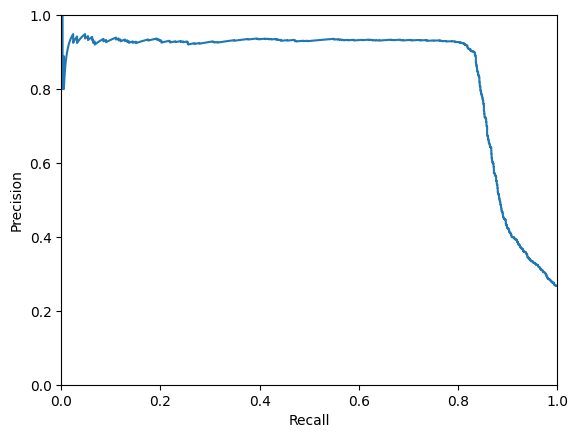

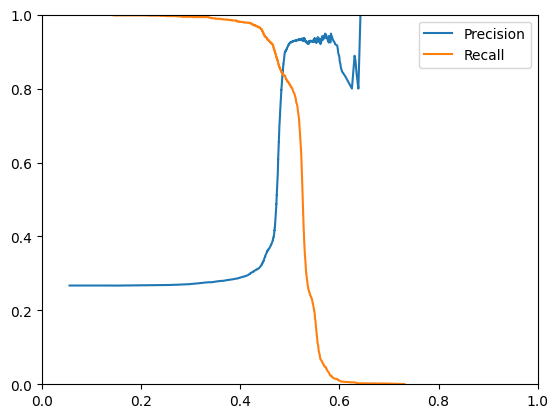

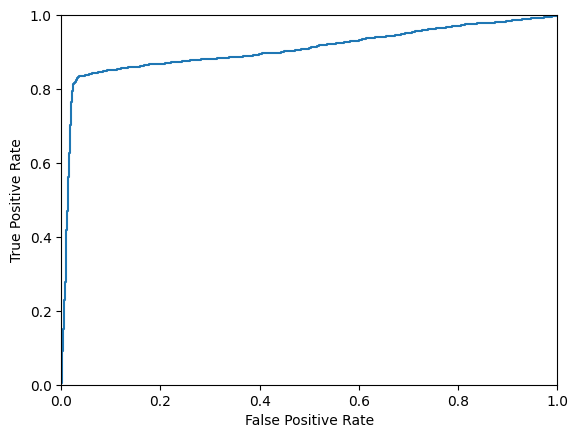

In [17]:
precision, recall, threshold = precision_recall_curve(y_test, ada_boost.predict_proba(X_test)[:, 1])
plt.plot(recall, precision) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

fpr, tpr, threshold = roc_curve(y_test, ada_boost.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


In [18]:
with open('models/ada_boost.pkl', 'wb') as f:
    pickle.dump(ada_boost, f)